# Student Loan Risk with Deep Learning

In [1]:
# Imports
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from pathlib import Path
import numpy as np

---

## Prepare the data to be used on a neural network model

### Step 1: Read the `student-loans.csv` file into a Pandas DataFrame. Review the DataFrame, looking for columns that could eventually define your features and target variables.   

In [2]:
# Read the csv into a Pandas DataFrame
file_path = "https://static.bc-edx.com/ai/ail-v-1-0/m18/lms/datasets/student-loans.csv"
loans_df = pd.read_csv(file_path)

# Review the DataFrame
loans_df.head()

,payment_history,location_parameter,stem_degree_score,gpa_ranking,alumni_success,study_major_code,time_to_completion,finance_workshop_score,cohort_ranking,total_loan_score,financial_aid_score,credit_ranking
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [3]:
# Review the data types associated with the columns
loans_df.dtypes

payment_history           float64
location_parameter        float64
stem_degree_score         float64
gpa_ranking               float64
alumni_success            float64
study_major_code          float64
time_to_completion        float64
finance_workshop_score    float64
cohort_ranking            float64
total_loan_score          float64
financial_aid_score       float64
credit_ranking              int64
dtype: object

In [5]:
# Check the credit_ranking value counts
loans_df["credit_ranking"].value_counts()

credit_ranking
1    855
0    744
Name: count, dtype: int64

### Step 2: Using the preprocessed data, create the features (`X`) and target (`y`) datasets. The target dataset should be defined by the preprocessed DataFrame column “credit_ranking”. The remaining columns should define the features dataset.

In [7]:
# Define the target set y using the credit_ranking column
y =loans_df["credit_ranking"]

# Display a sample of y
np.array(y)

array([0, 0, 0, ..., 1, 0, 1])

In [10]:
# Define features set X by selecting all columns but credit_ranking


# Review the features DataFrame
X = loans_df.drop('credit_ranking', axis=1)
X.head()

,payment_history,location_parameter,stem_degree_score,gpa_ranking,alumni_success,study_major_code,time_to_completion,finance_workshop_score,cohort_ranking,total_loan_score,financial_aid_score
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


### Step 3: Split the features and target sets into training and testing datasets.


In [11]:
# Split the preprocessed data into a training and testing dataset
# Assign the function a random_state equal to 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


### Step 4: Use scikit-learn's `StandardScaler` to scale the features data.

In [12]:
# Create a StandardScaler instance
scaler = StandardScaler()


# Fit the scaler to the features training dataset

scaler.fit(X_train)

# Fit the scaler to the features training dataset
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


---

## Compile and Evaluate a Model Using a Neural Network

### Step 1: Create a deep neural network by assigning the number of input features, the number of layers, and the number of neurons on each layer using Tensorflow’s Keras.

> **Hint** You can start with a two-layer deep neural network model that uses the `relu` activation function for both layers.


In [17]:
# Define the the number of inputs (features) to the model

num_features = X_train.shape[1]

# Review the number of features
X_train.shape[1]

11

In [18]:
# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1 = 16

# Define the number of hidden nodes for the second hidden layer
hidden_nodes_layer2 = 8


# Define the number of neurons in the output layer
output_neurons = 1

In [19]:
# Create the Sequential model instance
model = Sequential()

# Add the first hidden layer

model.add(Dense(units=hidden_nodes_layer1, activation='relu', input_dim=num_features))

# Add the second hidden layer
model.add(Dense(units=hidden_nodes_layer2, activation='relu'))


# Add the output layer to the model specifying the number of output neurons and activation function
model.add(Dense(units=output_neurons, activation='sigmoid'))


In [20]:
# Display the Sequential model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                192       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 337
Trainable params: 337
Non-trainable params: 0
_________________________________________________________________


### Step 2: Compile and fit the model using the `binary_crossentropy` loss function, the `adam` optimizer, and the `accuracy` evaluation metric.


In [21]:
# Compile the Sequential model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [27]:
# Fit the model using 50 epochs and the training data
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/50
32/32 [==============================] - 0s 1ms/step - loss: 0.4493 - accuracy: 0.7859 - val_loss: 0.5036 - val_accuracy: 0.7500
Epoch 2/50
32/32 [==============================] - 0s 612us/step - loss: 0.4479 - accuracy: 0.7869 - val_loss: 0.5052 - val_accuracy: 0.7539
Epoch 3/50
32/32 [==============================] - 0s 640us/step - loss: 0.4470 - accuracy: 0.7879 - val_loss: 0.5055 - val_accuracy: 0.7500
Epoch 4/50
32/32 [==============================] - 0s 631us/step - loss: 0.4459 - accuracy: 0.7859 - val_loss: 0.5065 - val_accuracy: 0.7539
Epoch 5/50
32/32 [==============================] - 0s 593us/step - loss: 0.4450 - accuracy: 0.7879 - val_loss: 0.5060 - val_accuracy: 0.7500
Epoch 6/50
32/32 [==============================] - 0s 616us/step - loss: 0.4439 - accuracy: 0.7898 - val_loss: 0.5061 - val_accuracy: 0.7500
Epoch 7/50
32/32 [==============================] - 0s 608us/step - loss: 0.4440 - accuracy: 0.7869 - val_loss: 0.5065 - val_accuracy: 0.7500
Epoch 8/

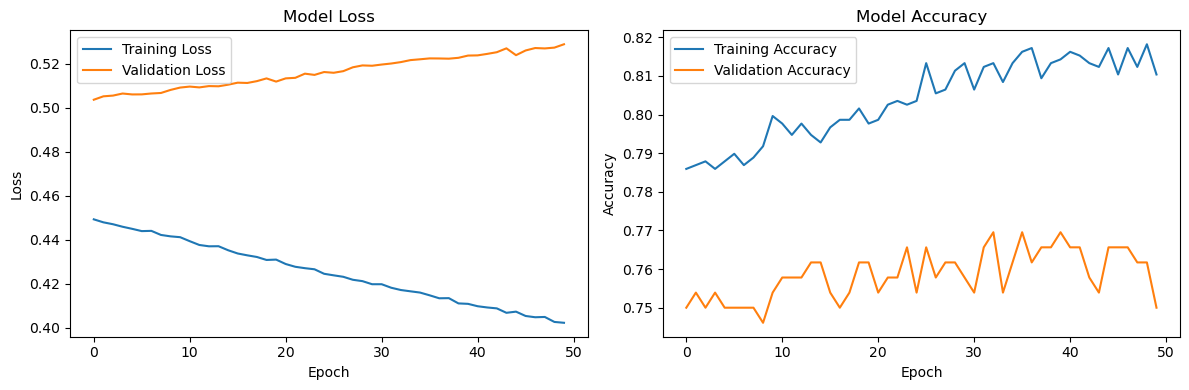

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

### Step 3: Evaluate the model using the test data to determine the model’s loss and accuracy.


In [30]:
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data

loss, accuracy = model.evaluate(X_test_scaled, y_test, verbose=2)


# Display the model loss and accuracy results
print(f"Loss: {loss}, Accuracy: {accuracy}")


10/10 - 0s - loss: 0.5444 - accuracy: 0.7437 - 18ms/epoch - 2ms/step
Loss: 0.5443543791770935, Accuracy: 0.7437499761581421


### Step 4: Save and export your model to a keras file, and name the file `student_loans.keras`.


In [32]:
# Set the model's file path
file_path = Path("student_loans.keras")


# Export your model to a keras file
model.save(file_path)

---
## Predict Loan Repayment Success by Using your Neural Network Model

### Step 1: Reload your saved model.

In [33]:
# Set the model's file path

file_path = Path("student_loans.keras")

# Load the model to a new object
nn_imported = tf.keras.models.load_model(file_path)

### Step 2: Make predictions on the testing data and save the predictions to a DataFrame.

In [34]:
# Make predictions with the test data
predictions = model.predict(X_test_scaled)


# Display a sample of the predictions
sample_predictions = predictions[:5] 
print(sample_predictions)

10/10 [==============================] - 0s 475us/step
[[0.3788118 ]
 [0.29374206]
 [0.81983495]
 [0.7900154 ]
 [0.992442  ]]


In [39]:
# Save the predictions to a DataFrame and round the predictions to binary results
predictions_df = pd.DataFrame(columns=['Prediction'], data=predictions)
predictions_df["Prediction"] = round(predictions_df["Prediction"],0)
predictions_df

,Prediction
0,0.0
1,0.0
2,1.0
3,1.0
4,1.0
...,...
315,1.0
316,0.0
317,0.0
318,1.0


### Step 4: Display a classification report with the y test data and predictions

In [41]:
# Print the classification report with the y test data and predictions
print(classification_report(y_test, predictions_df["Prediction"].values))

              precision    recall  f1-score   support

           0       0.73      0.75      0.74       154
           1       0.76      0.74      0.75       166

    accuracy                           0.74       320
   macro avg       0.74      0.74      0.74       320
weighted avg       0.74      0.74      0.74       320



---
## Discuss creating a recommendation system for student loans

1. Describe the data that you would need to collect to build a recommendation system to recommend student loan options for students. Explain why this data would be relevant and appropriate.
To build a recommendation system for student loan options, the following data would be necessary:

Student Demographics: Age, gender, location, family income, and parental education levels. This data helps understand the socio-economic background of the student.
Academic Information: GPA, major, school ranking, and expected graduation date. This helps gauge the student's academic standing and potential future income.
Loan History: Previous loans taken, repayment history, and loan amounts. This data provides insight into the student's borrowing behavior and creditworthiness.
Financial Aid Information: Scholarships, grants, work-study programs, and other financial aid received. This helps assess the student's current financial support.
Employment Information: Part-time jobs, internships, and job offers. This can help predict the student's ability to repay the loan.
Preferences and Needs: Preferences for loan types (fixed vs. variable rates), repayment terms, and deferment options. This ensures the recommendations align with the student's personal preferences.
This data is relevant because it provides a comprehensive picture of the student's financial situation, academic prospects, and borrowing behavior, which are critical factors in recommending appropriate loan options.

2. Based on the data you chose to use in this recommendation system, would your model be using collaborative filtering, content-based filtering, or context-based filtering? Justify why the data you selected would be suitable for your choice of filtering method.
The recommendation system would primarily use content-based filtering. Content-based filtering focuses on the attributes of the items (in this case, loan options) and the user's profile.

Why Content-Based Filtering:
The data includes detailed attributes about the students and the loans, such as academic performance, financial status, and personal preferences.
Each student's loan recommendation can be personalized based on their specific profile and needs.
Content-based filtering allows the system to recommend loans that fit the student's unique circumstances, even if similar users have not taken those loans.
Collaborative filtering could also be used as a complementary approach if there's sufficient data on how similar students have interacted with different loan options. However, content-based filtering is more suitable given the detailed and varied nature of the student and loan attributes.

3. Describe two real-world challenges that you would take into consideration while building a recommendation system for student loans. Explain why these challenges would be of concern for a student loan recommendation system.
Challenge 1: Data Privacy and Security

Concern: Student loan applications involve sensitive personal and financial information. Ensuring the privacy and security of this data is paramount to prevent identity theft, fraud, and breaches of confidentiality.
Solution: Implement robust data encryption, secure access protocols, and compliance with data protection regulations (such as GDPR or FERPA) to safeguard student information.
Challenge 2: Bias and Fairness

Concern: The recommendation system must avoid biases that could unfairly disadvantage certain groups of students, such as those from lower-income families or underrepresented backgrounds.
Solution: Regularly audit the system for biases, ensure diverse training data, and incorporate fairness constraints into the recommendation algorithms to promote equitable access to loan options.
Addressing these challenges is crucial for maintaining the trust and reliability of the recommendation system, ensuring it provides fair and secure loan recommendations to all students.